<a href="https://colab.research.google.com/github/kongqiahaha/python-/blob/master/deeplearning_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#数据读取及库的引入

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as ke
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
from skimage.transform import resize
import os

TensorFlow 2.x selected.


In [0]:
Y=pd.read_csv("/content/drive/My Drive/data/deeplearning test/头部ct数据/labels.csv",usecols=[1])

In [0]:
Y=np.array(Y)

In [4]:
Y.shape

(200, 1)

(957, 821, 3)


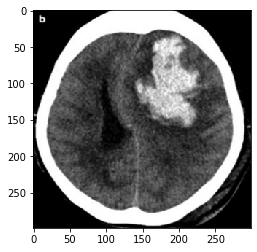

In [5]:
x = plt.imread("/content/drive/My Drive/data/deeplearning test/头部ct数据/head_ct/head_ct/000.png")
print(x.shape)
x=resize(x,(299,299,3))
x.shape
plt.imshow(x)

In [6]:
x=[]
directory_name="/content/drive/My Drive/data/deeplearning test/头部ct数据/head_ct/head_ct"
for filename in os.listdir(directory_name):
  image=plt.imread(directory_name+"/"+filename)
  image=resize(image,(299,299,3))
  x.append(image)
x=np.array(x)
x.shape

(200, 299, 299, 3)

In [0]:
def mix(x,y):
  m=x.shape[0]
  print(m)
  permutation = list(np.random.permutation(m))
  shuffled_x = x[permutation,:]
  shuffled_y = y[permutation].reshape((m,1))
  return shuffled_x,shuffled_y

In [8]:
x,y=mix(x,Y)
x=x/255
x_train=x[:120]
y_train=y[:120]
x_test=x[120:]
y_test=y[120:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train)

200
(120, 299, 299, 3)
(120, 1)
(80, 299, 299, 3)
(80, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]


# 单层神经网络(keras)

In [9]:
model = ke.Sequential()
model.add(ke.layers.Flatten(input_shape=(299,299,3)))
model.add(ke.layers.Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 268203)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 268204    
Total params: 268,204
Trainable params: 268,204
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train,y_train,epochs=50)

Train on 120 samples
Epoch 1/50
120/120 [==============================] - 0s 4ms/sample - loss: 0.7191 - accuracy: 0.5417
Epoch 2/50
120/120 [==============================] - 0s 804us/sample - loss: 0.6654 - accuracy: 0.5500
Epoch 3/50
120/120 [==============================] - 0s 797us/sample - loss: 0.6585 - accuracy: 0.7583
Epoch 4/50
120/120 [==============================] - 0s 819us/sample - loss: 0.6320 - accuracy: 0.7000
Epoch 5/50
120/120 [==============================] - 0s 783us/sample - loss: 0.6178 - accuracy: 0.6083
Epoch 6/50
120/120 [==============================] - 0s 872us/sample - loss: 0.6071 - accuracy: 0.6083
Epoch 7/50
120/120 [==============================] - 0s 836us/sample - loss: 0.5908 - accuracy: 0.6417
Epoch 8/50
120/120 [==============================] - 0s 854us/sample - loss: 0.5827 - accuracy: 0.8000
Epoch 9/50
120/120 [==============================] - 0s 813us/sample - loss: 0.5671 - accuracy: 0.7917
Epoch 10/50
120/120 [========================

In [34]:
preds=model.evaluate(x_test,y_test)

80/80 [==============================] - 0s 602us/sample - loss: 0.4664 - accuracy: 0.7750


In [35]:
print(str(preds[0]))
print(str(preds[1]))

0.4663596272468567
0.775


#深层神经网络

In [13]:
model1=ke.Sequential()
model1.add(ke.layers.Flatten(input_shape=(299,299,3)))
model1.add(ke.layers.Dense(8,activation="relu"))
model1.add(ke.layers.Dense(16,activation="relu"))
model1.add(ke.layers.Dense(32,activation="relu"))
model1.add(ke.layers.Dense(1,activation="sigmoid"))
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 268203)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2145632   
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,146,353
Trainable params: 2,146,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model1.fit(x_train,y_train,epochs=50)

Train on 120 samples
Epoch 1/50
120/120 [==============================] - 1s 5ms/sample - loss: 0.6891 - accuracy: 0.5417
Epoch 2/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6843 - accuracy: 0.5417
Epoch 3/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6836 - accuracy: 0.5417
Epoch 4/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6793 - accuracy: 0.5417
Epoch 5/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6755 - accuracy: 0.5417
Epoch 6/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6720 - accuracy: 0.5417
Epoch 7/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6681 - accuracy: 0.5417
Epoch 8/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6626 - accuracy: 0.5417
Epoch 9/50
120/120 [==============================] - 0s 2ms/sample - loss: 0.6579 - accuracy: 0.5417
Epoch 10/50
120/120 [==============================] - 0s 2ms

In [31]:
preds1=model1.evaluate(x_test,y_test)

80/80 [==============================] - 0s 577us/sample - loss: 0.5390 - accuracy: 0.8125


In [30]:
print(str(preds1[0]))
print(str(preds1[1]))

0.12752827356259028
0.98333335


#卷积神经网络

In [0]:
model2=ke.Sequential()
model2.add(ke.layers.ZeroPadding2D(padding=(1,1)))
model2.add(ke.layers.Conv2D(8,kernel_size=(3,3),strides=(1,1)))
model2.add(ke.layers.BatchNormalization(axis=3))
model2.add(ke.layers.Activation("relu"))
model2.add(ke.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model2.add(ke.layers.ZeroPadding2D(padding=(1,1)))
model2.add(ke.layers.Conv2D(16,kernel_size=(3,3),strides=(1,1)))
model2.add(ke.layers.BatchNormalization(axis=3))
model2.add(ke.layers.Activation("relu"))
model2.add(ke.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model2.add(ke.layers.ZeroPadding2D(padding=(1,1)))
model2.add(ke.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1)))
model2.add(ke.layers.BatchNormalization(axis=3))
model2.add(ke.layers.Activation("relu"))
model2.add(ke.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model2.add(ke.layers.Flatten())
model2.add(ke.layers.Dense(1,activation="sigmoid"))
model2.compile(optimizer=ke.optimizers.Adam(),loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
model2.fit(x_train,y_train,epochs=15)

Train on 120 samples
Epoch 1/15
120/120 [==============================] - 9s 73ms/sample - loss: 5.1786 - accuracy: 0.5500
Epoch 2/15
120/120 [==============================] - 8s 66ms/sample - loss: 5.0758 - accuracy: 0.5167
Epoch 3/15
120/120 [==============================] - 8s 66ms/sample - loss: 1.7332 - accuracy: 0.6750
Epoch 4/15
120/120 [==============================] - 8s 66ms/sample - loss: 0.9745 - accuracy: 0.7750
Epoch 5/15
120/120 [==============================] - 8s 66ms/sample - loss: 0.3611 - accuracy: 0.9083
Epoch 6/15
120/120 [==============================] - 8s 66ms/sample - loss: 0.4460 - accuracy: 0.8667
Epoch 7/15
120/120 [==============================] - 8s 66ms/sample - loss: 0.2933 - accuracy: 0.8667
Epoch 8/15
120/120 [==============================] - 8s 66ms/sample - loss: 0.1331 - accuracy: 0.9583
Epoch 9/15
120/120 [==============================] - 8s 66ms/sample - loss: 0.0737 - accuracy: 0.9667
Epoch 10/15
120/120 [==============================]

In [36]:
preds2=model2.evaluate(x_train,y_train)

120/120 [==============================] - 3s 22ms/sample - loss: 0.7295 - accuracy: 0.5417


In [26]:
print(str(preds2[0]))
print(str(preds2[1]))

0.8068178772926331
0.4375


#transfer learning(inception)

In [0]:
base_model=ke.applications.inception_v3.InceptionV3(weights="imagenet",include_top=False)
x=base_model.output
x=ke.layers.GlobalAveragePooling2D()(x)
x=ke.layers.Dense(1024,activation="relu")(x)
predictions=ke.layers.Dense(1,activation="sigmoid")(x)
model3 =ke.Model(inputs=base_model.input,outputs=predictions)


In [0]:
def setup_to_transfer_learning(model3,base_model):#base_model
    for layer in base_model.layers:
        layer.trainable = False
    model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
setup_to_transfer_learning(model3,base_model)
model3.fit(x_train,y_train,epochs=10)


Train on 120 samples
Epoch 1/10
120/120 [==============================] - 32s 265ms/sample - loss: 1.0765 - accuracy: 0.5667
Epoch 2/10
120/120 [==============================] - 28s 233ms/sample - loss: 0.5026 - accuracy: 0.7333
Epoch 3/10
120/120 [==============================] - 28s 233ms/sample - loss: 0.3371 - accuracy: 0.9167
Epoch 4/10
120/120 [==============================] - 28s 235ms/sample - loss: 0.2435 - accuracy: 0.9333
Epoch 5/10
120/120 [==============================] - 28s 234ms/sample - loss: 0.1902 - accuracy: 0.9583
Epoch 6/10
120/120 [==============================] - 28s 233ms/sample - loss: 0.1440 - accuracy: 0.9833
Epoch 7/10
120/120 [==============================] - 28s 234ms/sample - loss: 0.1143 - accuracy: 0.9750
Epoch 8/10
120/120 [==============================] - 28s 235ms/sample - loss: 0.1491 - accuracy: 0.9500
Epoch 9/10
120/120 [==============================] - 28s 234ms/sample - loss: 0.0866 - accuracy: 0.9750
Epoch 10/10
120/120 [=============

In [40]:
preds3=model3.evaluate(x_test,y_test)

80/80 [==============================] - 18s 224ms/sample - loss: 2.2039 - accuracy: 0.5625


In [28]:
print(str(preds3[0]))
print(str(preds3[1]))

1.4022333383560182
0.5625
